### Basics of image processing in python. Libraries used in image processing like: Numpy, Opencv, Matplotlib, Scikit-learn, Scipy, Pil and pillow

#### Basics of Image Processing involves:
- Reading images: Loading an image into a program for analysis.
- Displaying images: Viewing the image to understand its structure.
- Manipulating images: Changing brightness, contrast, resizing, or rotating.
- Filtering images: Applying convolution filters (blur, sharpen, edge detection).
- Segmenting images: Identifying regions or objects within an image.

#### Libraries used in image processing:

##### 1. NumPy
- Purpose: Numerical operations on multi-dimensional arrays. Images can be represented as arrays,
  enabling pixel-level manipulation.
- Key Functions:
  - np.array(): Creates an array (image data representation).
  - np.zeros(): Creates a blank image (array filled with zeros).
  - np.mean(), np.sum(): Statistical analysis on image data.
  - image[:, :, 0]: Accessing specific color channels (Red, Green, Blue).

##### 2. OpenCV (cv2)
- Purpose: A comprehensive library for computer vision and image processing.
- Key Functions:
  - cv2.imread(): Reads an image from a file.
  - cv2.imshow(): Displays an image in a window.
  - cv2.imwrite(): Saves an image to a file.
  - cv2.cvtColor(): Converts an image to a different color space (e.g., RGB to Grayscale).
  - cv2.resize(): Resizes the image.
  - cv2.GaussianBlur(): Applies Gaussian blur to an image.
  - cv2.Canny(): Performs edge detection.
  - cv2.threshold(): Applies binary thresholding.

##### 3. Matplotlib
- Purpose: Visualization library primarily used for plotting, also useful for displaying images.
- Key Functions:
  - plt.imshow(): Displays an image.
  - plt.title(): Sets a title for the displayed image.
  - plt.axis(): Toggles the axis display.
  - plt.show(): Renders the image or plot.

##### 4. Pillow (PIL)
- Purpose: Image manipulation like opening, editing, and saving image files.
- Key Functions:
  - Image.open(): Opens an image file.
  - Image.show(): Displays the image.
  - Image.save(): Saves the image.
  - Image.resize(): Resizes the image.
  - Image.rotate(): Rotates the image.
  - Image.convert(): Converts the image mode (e.g., RGB to Grayscale).

##### 5. Scikit-Image
- Purpose: Image processing and analysis, including filters, transformations, and feature extraction.
- Key Functions:
  - io.imread(): Reads an image from a file.
  - filters.sobel(): Applies edge detection using the Sobel filter.
  - transform.resize(): Resizes the image.
  - color.rgb2gray(): Converts an RGB image to grayscale.
  - exposure.histogram(): Computes the histogram of image intensities.

##### 6. SciPy
- Purpose: Scientific computing with specialized submodules like ndimage for image processing.
- Key Functions:
  - ndimage.gaussian_filter(): Applies Gaussian blur.
  - ndimage.rotate(): Rotates an image.
  - ndimage.zoom(): Zooms into an image (resizing).
  - ndimage.convolve(): Applies convolution (filtering)


In [1]:
# Libraries commonly used in image processing
import cv2
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
import os
import random

import warnings
warnings.filterwarnings("ignore")

Extracted 1700 frames.


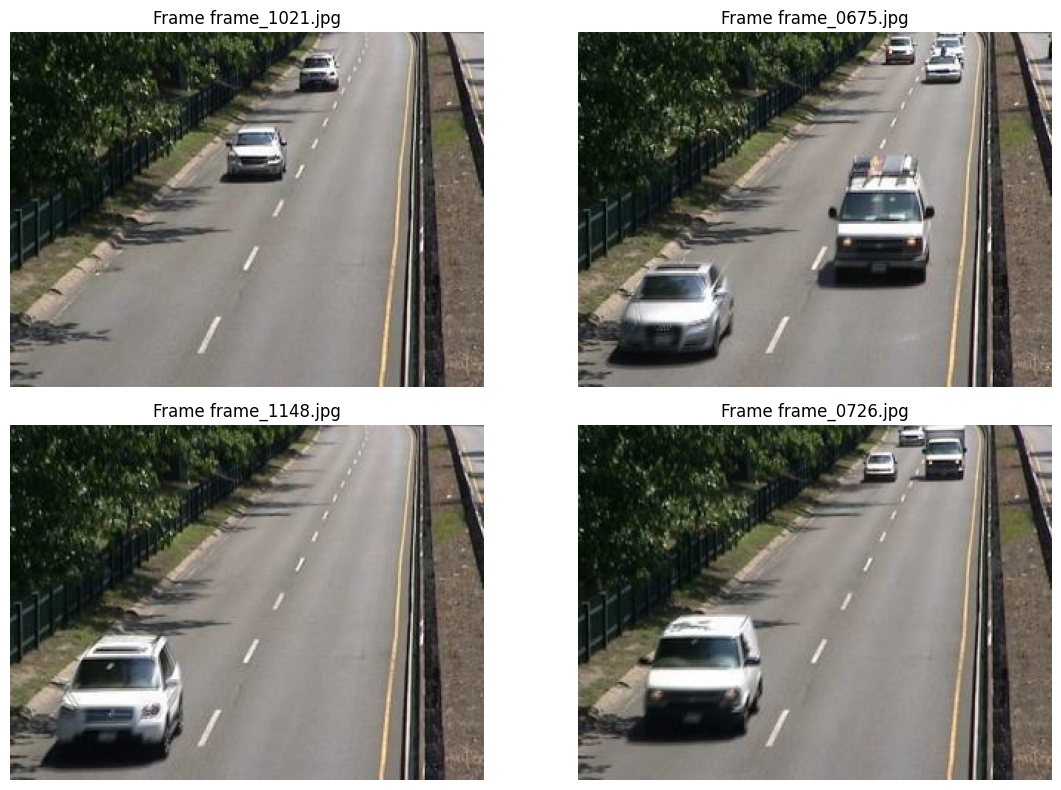

In [2]:
# Read video and convert to frames
def video_to_frames(video_path, output_folder):
    video = cv2.VideoCapture(video_path)
    frame_count = 0

    while True:
        ret, frame = video.read()
        if not ret:
            break
        frame_path = f"{output_folder}/frame_{frame_count:04d}.jpg"
        cv2.imwrite(frame_path, frame)
        frame_count += 1

    video.release()
    print(f"Extracted {frame_count} frames.")

# Example usage
video_to_frames('Video1.avi', 'frames_folder')

# Show random frames

# Get list of frames
frame_files = os.listdir('frames_folder')
frame_files = [f for f in frame_files if f.endswith('.jpg')]

# Randomly select 4 frames
sample_frames = random.sample(frame_files, min(4, len(frame_files)))

# Create subplot grid
plt.figure(figsize=(12, 8))
for i, frame_file in enumerate(sample_frames, 1):
    frame = cv2.imread(os.path.join('frames_folder', frame_file))
    frame = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)  # Convert BGR to RGB for display
    plt.subplot(2, 2, i)
    plt.imshow(frame)
    plt.title(f'Frame {frame_file}')
    plt.axis('off')

plt.tight_layout()
plt.show()

In [4]:
# Convert frames to video
def frames_to_video(frames_folder, output_video, fps):
    frame_files = os.listdir(frames_folder)
    frame_files = [f for f in frame_files if f.endswith('.jpg')]
    frame_files.sort()
    first_frame = cv2.imread(os.path.join(frames_folder, frame_files[0]))
    height, width, _ = first_frame.shape
    output_video = f"{output_video.split('.')[0]}_{fps}_fps.mp4"
    video_writer = cv2.VideoWriter(output_video, cv2.VideoWriter_fourcc(*'mp4v'), fps, (width, height))
    for frame_file in frame_files:
        frame = cv2.imread(os.path.join(frames_folder, frame_file))
        video_writer.write(frame)
    video_writer.release()
    print(f"Video saved as {output_video}")

frames_to_video('frames_folder', 'output_video.mp4', 30)
frames_to_video('frames_folder', 'output_video.mp4', 90)

Video saved as output_video_30_fps.mp4
Video saved as output_video_90_fps.mp4


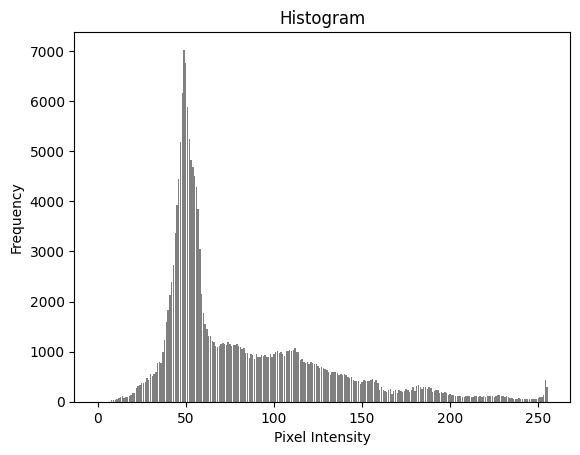

In [6]:
# Compute histogram manually
def compute_histogram(image):
    histogram = np.zeros(256, dtype=int)
    for pixel in image.ravel():
        histogram[pixel] += 1
    return histogram

# Example usage
gray_image = cv2.imread('img.png', cv2.IMREAD_GRAYSCALE)
hist = compute_histogram(gray_image)

# Plot histogram
plt.bar(range(256), hist, color='gray')
plt.title("Histogram")
plt.xlabel("Pixel Intensity")
plt.ylabel("Frequency")
plt.show()

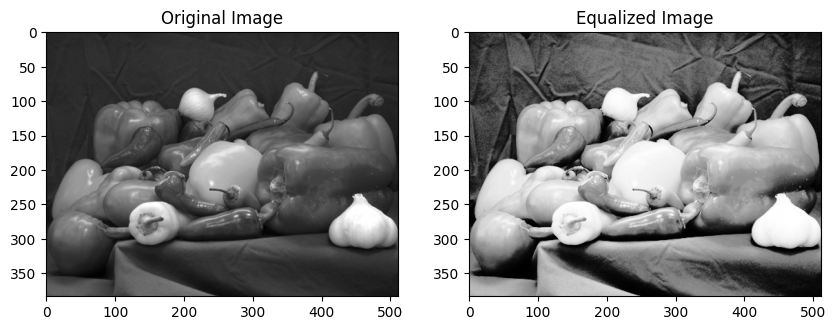

In [7]:
# Perform histogram equalization
def histogram_equalization(image):
    histogram = compute_histogram(image)
    cdf = np.cumsum(histogram)  # Cumulative Distribution Function
    cdf_normalized = cdf * 255 / cdf[-1]  # Normalize to 0-255
    equalized_image = np.interp(image.ravel(), range(256), cdf_normalized).reshape(image.shape).astype(np.uint8)
    return equalized_image

# Example usage
equalized_image = histogram_equalization(gray_image)

# Display original and equalized image
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(gray_image, cmap='gray')
plt.title("Original Image")
plt.subplot(1, 2, 2)
plt.imshow(equalized_image, cmap='gray')
plt.title("Equalized Image")
plt.show()

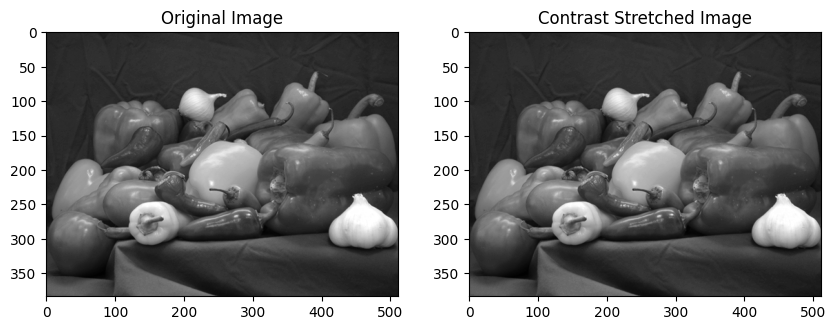

In [8]:
# Perform contrast stretching
def contrast_stretching(image):
    min_val, max_val = np.min(image), np.max(image)
    stretched_image = ((image - min_val) * (255 / (max_val - min_val))).astype(np.uint8)
    return stretched_image

# Example usage
stretched_image = contrast_stretching(gray_image)

# Display original and stretched image
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(gray_image, cmap='gray')
plt.title("Original Image")
plt.subplot(1, 2, 2)
plt.imshow(stretched_image, cmap='gray')
plt.title("Contrast Stretched Image")
plt.show()